In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# miscellaneous
import warnings
warnings.filterwarnings("ignore")



In [2]:
titanic = pd.read_csv("/Users/ozlemunal/Desktop/spiced/my_encounter_notes/week_02/data/train.csv", index_col = 0)

titanic.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic['Age'].replace([np.nan], titanic['Age'].mean(), inplace=True)
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [57]:
#titanic['Pclass'].value_counts(normalize=True)


In [4]:
# Find out the proportion of sibsp survived.
titanic["SibSp"].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [5]:
sib_live = titanic.groupby("SibSp")["Survived"].count()
sib_live

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

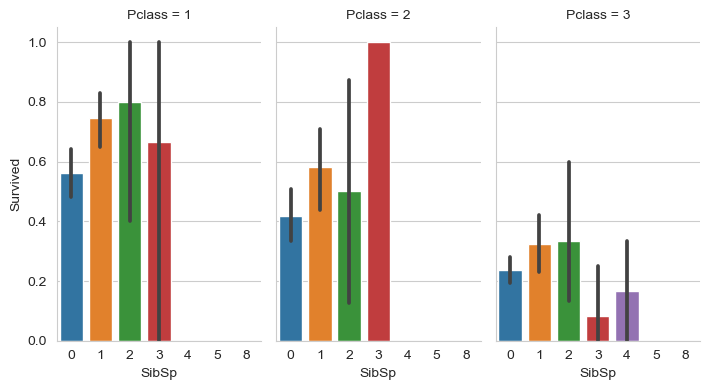

In [6]:
sns.catplot(
    data=titanic, x="SibSp", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6,
)

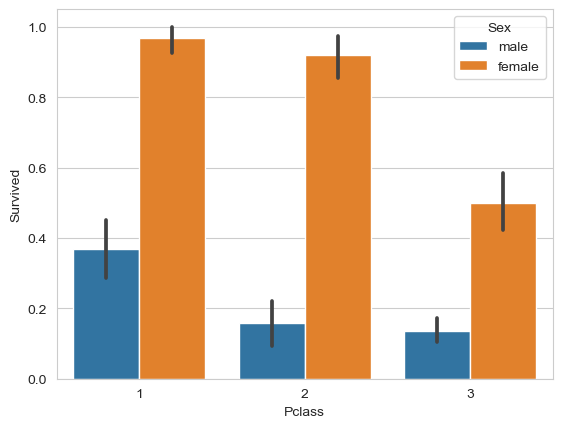

In [7]:
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=titanic
);

In [8]:
titanic['Sex_category'] = titanic['Sex'].map({'male':0, 'female':1})
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1


In [24]:
# Delete age but add the intereaction between sex and pclass interaction. 
X = titanic[['Pclass', 'Sex_category', "SibSp"]]
y = titanic['Survived']

In [25]:
X.shape, y.shape

((891, 3), (891,))

In [26]:
# stratify is for splitting the data propotionly similiar to ecah other (training and test).
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y
)

In [27]:
y_train.value_counts(normalize=True)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [28]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler

# instantiate standard scaler 
scaler = StandardScaler()

# fit and transform training data
X_train = scaler.fit_transform(X_train)

# transform test data
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[ 0.82457534,  1.29876574, -0.47570704],
       [ 0.82457534, -0.76996179, -0.47570704],
       [ 0.82457534,  1.29876574, -0.47570704],
       ...,
       [ 0.82457534, -0.76996179, -0.47570704],
       [-1.56200045, -0.76996179, -0.47570704],
       [ 0.82457534, -0.76996179, -0.47570704]])

In [31]:
# instatiate the model
model = LogisticRegression()

In [32]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# our coefficients
model.coef_, model.intercept_

(array([[-0.78735494,  1.36780208, -0.21423638]]), array([-0.66905888]))

In [34]:
# score on the training data
model.score(X_train, y_train)

0.8089887640449438

In [35]:
# score on the testing data
model.score(X_test, y_test)

0.7653631284916201